<a href="https://colab.research.google.com/github/jcs-lambda/lambdata-jcs-lambda/blob/master/notebooks/lambdata_testbed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -i https://test.pypi.org/simple/ lambdata-jcslambda==0.4.3

Looking in indexes: https://test.pypi.org/simple/
  Found existing installation: lambdata-jcslambda 0.4.2
    Uninstalling lambdata-jcslambda-0.4.2:
      Successfully uninstalled lambdata-jcslambda-0.4.2


In [2]:
import lambdata_jcslambda
dir(lambdata_jcslambda)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [3]:
print(lambdata_jcslambda.__doc__)

A collection of data science helper functions.

Modules:
df_utils - functions for exploring and manipulating a dataframe
explorator - class to apply df_utils functions to a single dataframe

Requires:
pandas
numpy
scikit-learn
matplotlib
seaborn
ipython
ipywidgets



In [0]:
import lambdata_jcslambda.df_utils as my

In [5]:
df = my.pd.read_csv('https://github.com/jcs-lambda/unit2-syllables/blob/master/assets/words.csv?raw=true')
df

,entry,entry_rich,syllables,syllables_group,length,num_vowels,vowel_chunks,max_vowel_chunk_length,ends_with_e,h_as_vowel,num_ys,ends_with_y,y_as_consonant,num_consonants,consonant_chunks,max_consonant_chunk_length,num_doubled_consonants
0,Aachen,Aa·chen,2,1-2,6,3,3,2,False,False,0,False,False,3,2,2,0
1,aah,aah,1,1-2,3,2,2,2,False,False,0,False,False,1,1,1,0
2,Aalborg,Aal·borg,2,1-2,7,3,3,2,False,False,0,False,False,4,2,2,0
3,Aalesund,Aa·le·sund,3,3-5,8,4,4,2,False,False,0,False,False,4,3,2,0
4,aalii,aa·li·i,3,3-5,5,4,4,2,False,False,0,False,False,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89072,glazer,glaz·er,2,1-2,6,2,2,1,False,False,0,False,False,4,3,2,0
89073,Glazer,Gla·zer,2,1-2,6,2,2,1,False,False,0,False,False,4,3,2,0
89074,glazier,gla·zier,2,1-2,7,3,3,2,False,False,0,False,False,4,3,2,0
89075,glaziery,gla·zier·y,3,3-5,8,3,4,2,False,False,1,True,False,5,3,2,0


In [6]:
my.describe(df)

,type,total,present,null,nunique,minified_nunique,unique
entry,object,89077,89075,2,89075,87528,"Aachen, aah, Aalborg, ..., glazier, glaziery, ..."
entry_rich,object,89077,89075,2,89075,87528,"Aa·chen, aah, Aal·borg, ..., gla·zier, gla·zie..."
syllables,int64,89077,89077,0,10,10,"2, 1, 3, 4, 5, 6, 10, 7, 8, 9"
syllables_group,object,89077,89077,0,3,3,"1-2, 3-5, 6+"
length,int64,89077,89077,0,24,24,"6, 3, 7, 8, 5, 9, 10, 4, 11, 12, 14, 20, 13, 1..."
num_vowels,int64,89077,89077,0,12,12,"3, 2, 4, 5, 1, 6, 11, 7, 8, 9, 0, 10"
vowel_chunks,int64,89077,89077,0,12,12,"3, 2, 4, 5, 1, 6, 11, 7, 9, 8, 10, 12"
max_vowel_chunk_length,int64,89077,89077,0,6,6,"2, 1, 3, 5, 4, 6"
ends_with_e,bool,89077,89077,0,2,2,"False, True"
h_as_vowel,bool,89077,89077,0,2,2,"False, True"


In [7]:
train, val, test = my.tvt_split(df, 'syllables')
df.shape, train.shape, val.shape, test.shape

((89077, 17), (57008, 17), (14253, 17), (17816, 17))

In [8]:
my.value_counts(train, ['syllables', 'syllables_group'])

,count,percentage
syllables,,
2,20440,0.358546
3,16834,0.295292
4,9520,0.166994
1,4918,0.086269
5,3854,0.067605
6,1070,0.018769
7,284,0.004982
8,67,0.001175
9,14,0.000246


,count,percentage
syllables_group,,
3-5,30208,0.529891
1-2,25358,0.444815
6+,1442,0.025295


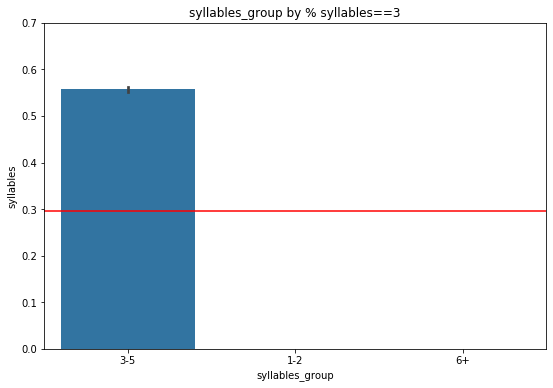

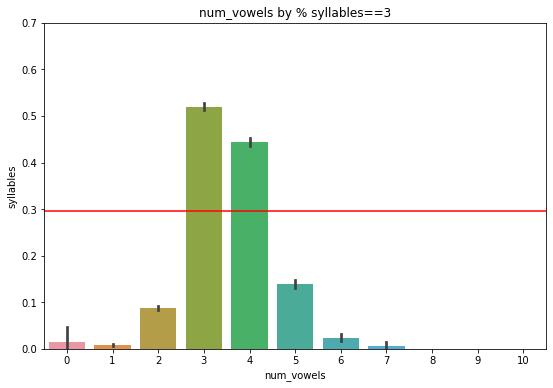

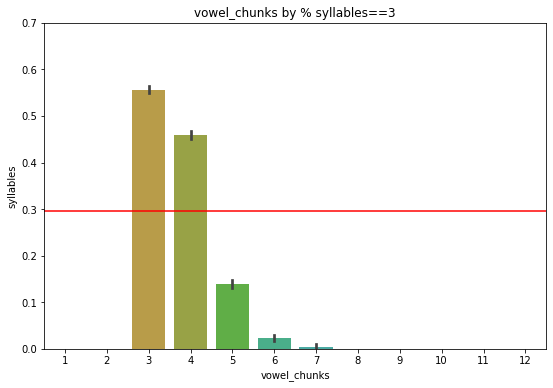

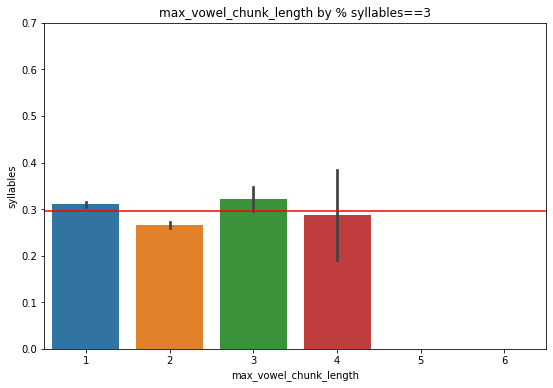

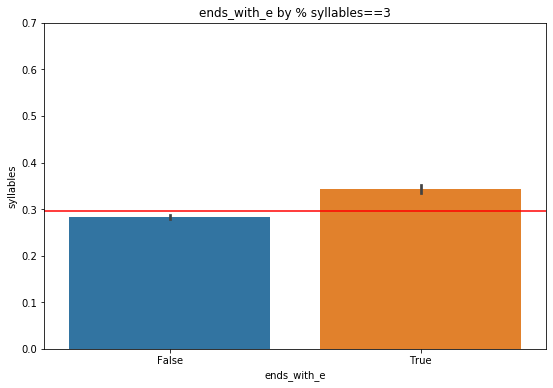

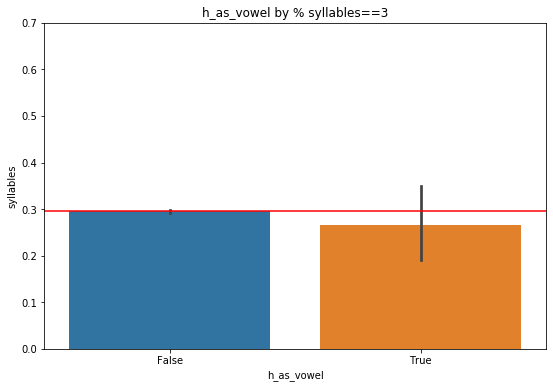

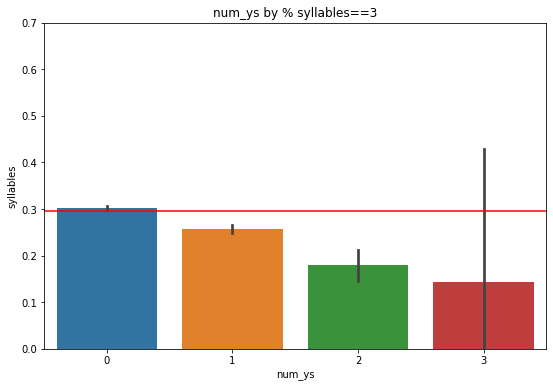

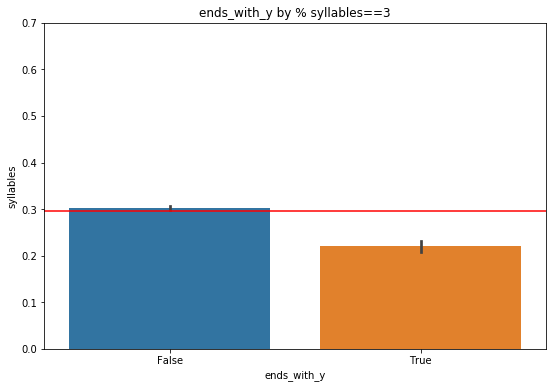

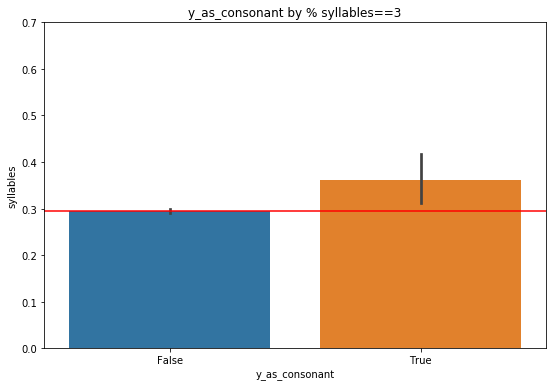

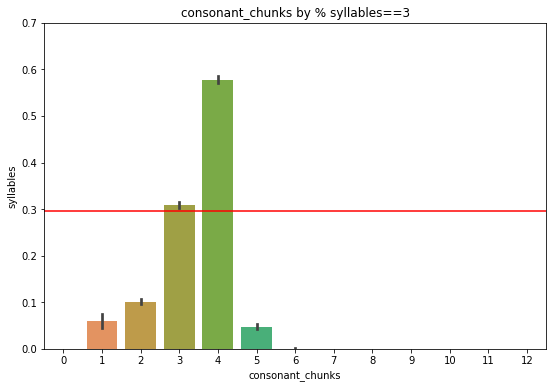

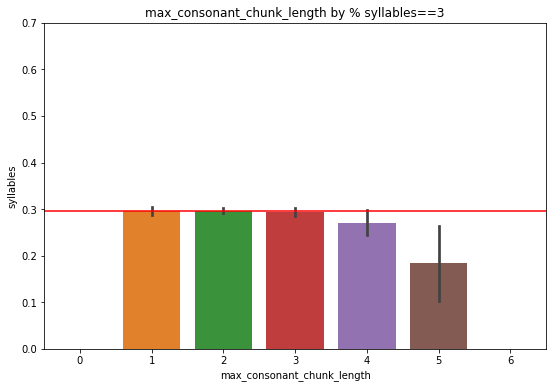

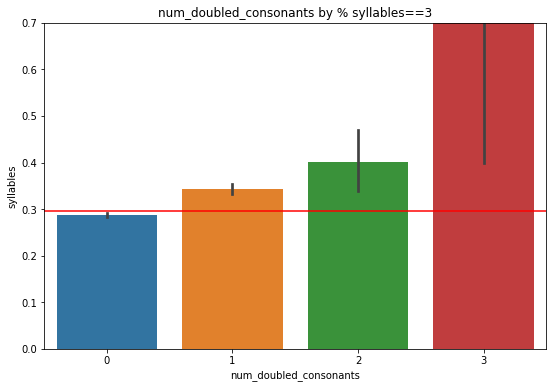

In [9]:
my.barplots_low_card_feat_by_target_eq_class('syllables', 3, train)

In [10]:
dates = my.pd.date_range(start='2017-01-01', end='2017-12-31', freq='W-WED')
dates = my.pd.DataFrame(dates, columns=['Date'])
dates.head()

,Date
0,2017-01-04
1,2017-01-11
2,2017-01-18
3,2017-01-25
4,2017-02-01


In [11]:
my.expand_date_parts(dataframe=dates, date_column='Date', simple=False)

,year,month,day,day_of_week,day_of_year,week,quarter
0,2017,1,4,2,4,1,1
1,2017,1,11,2,11,2,1
2,2017,1,18,2,18,3,1
3,2017,1,25,2,25,4,1
4,2017,2,1,2,32,5,1
5,2017,2,8,2,39,6,1
6,2017,2,15,2,46,7,1
7,2017,2,22,2,53,8,1
8,2017,3,1,2,60,9,1
9,2017,3,8,2,67,10,1


In [0]:
from lambdata_jcslambda.explorator import Explorator

In [13]:
xdf = Explorator(df)
xdf

In [15]:
xdf.tvt_split('syllables')
xdf.train.shape, xdf.val.shape, xdf.test.shape

((57008, 17), (14253, 17), (17816, 17))

In [16]:
xdf.describe()

,type,total,present,null,nunique,minified_nunique,unique
entry,object,89077,89075,2,89075,87528,"Aachen, aah, Aalborg, ..., glazier, glaziery, ..."
entry_rich,object,89077,89075,2,89075,87528,"Aa·chen, aah, Aal·borg, ..., gla·zier, gla·zie..."
syllables,int64,89077,89077,0,10,10,"2, 1, 3, 4, 5, 6, 10, 7, 8, 9"
syllables_group,object,89077,89077,0,3,3,"1-2, 3-5, 6+"
length,int64,89077,89077,0,24,24,"6, 3, 7, 8, 5, 9, 10, 4, 11, 12, 14, 20, 13, 1..."
num_vowels,int64,89077,89077,0,12,12,"3, 2, 4, 5, 1, 6, 11, 7, 8, 9, 0, 10"
vowel_chunks,int64,89077,89077,0,12,12,"3, 2, 4, 5, 1, 6, 11, 7, 9, 8, 10, 12"
max_vowel_chunk_length,int64,89077,89077,0,6,6,"2, 1, 3, 5, 4, 6"
ends_with_e,bool,89077,89077,0,2,2,"False, True"
h_as_vowel,bool,89077,89077,0,2,2,"False, True"


In [21]:
xdf.random_state is None

False

In [20]:
xdf.random_state = 15
xdf.random_state

15

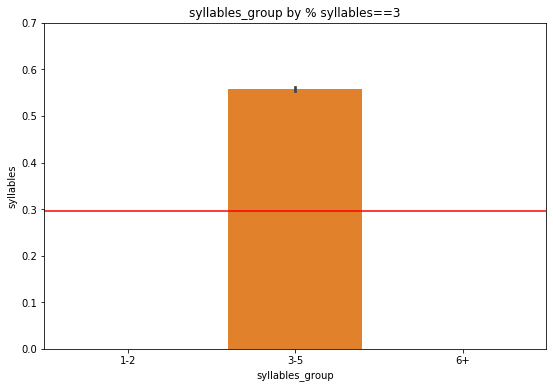

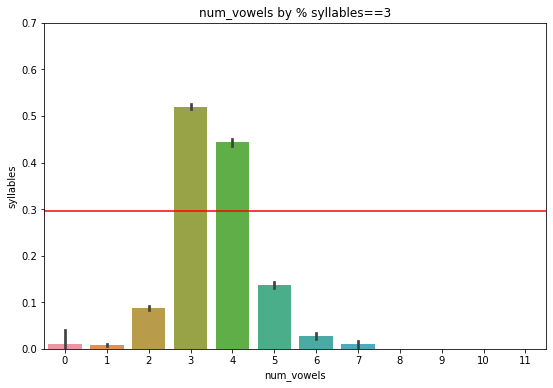

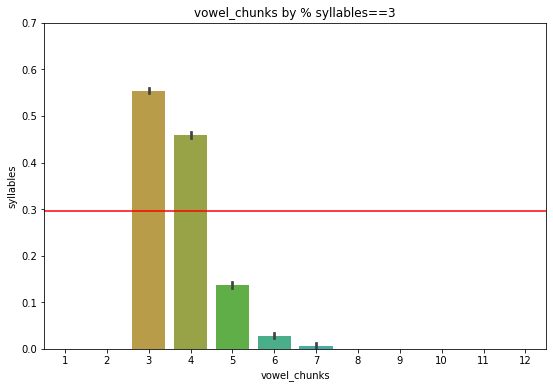

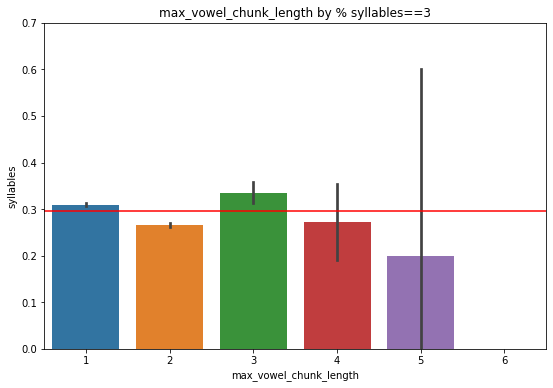

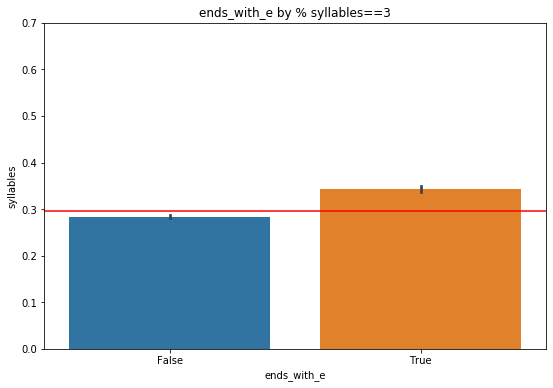

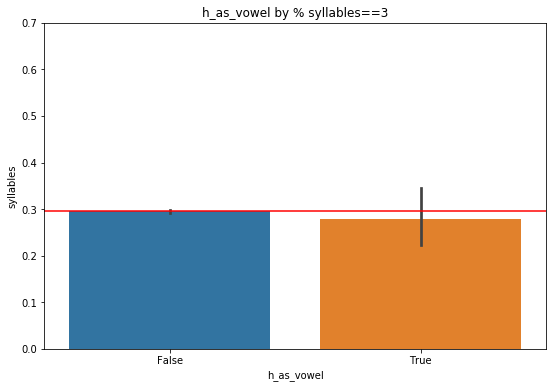

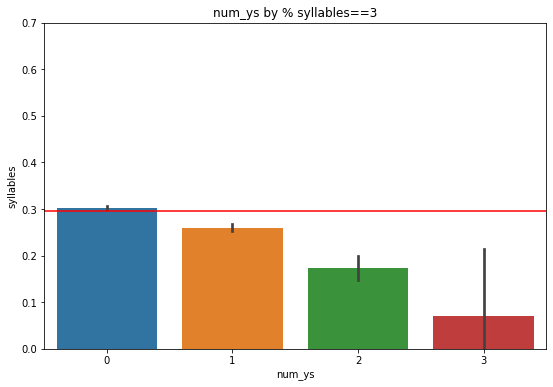

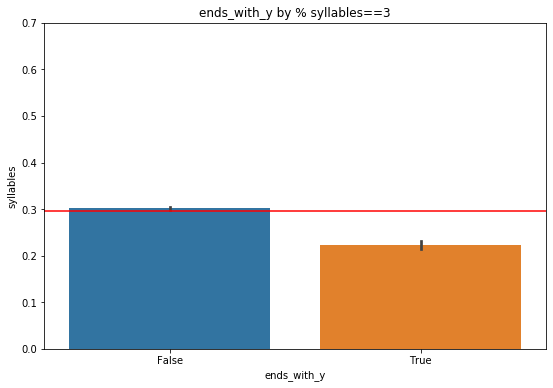

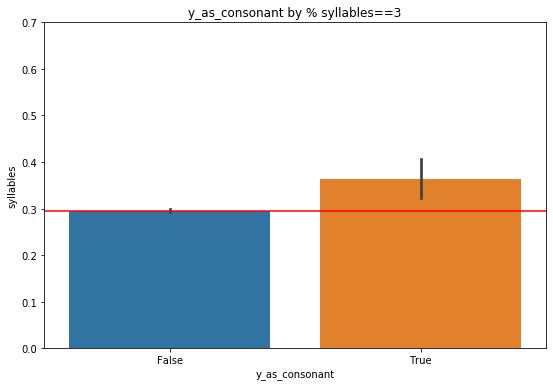

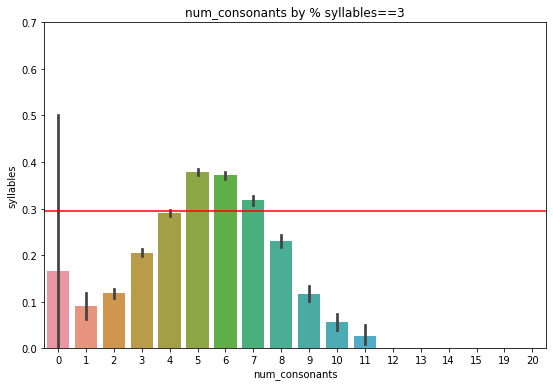

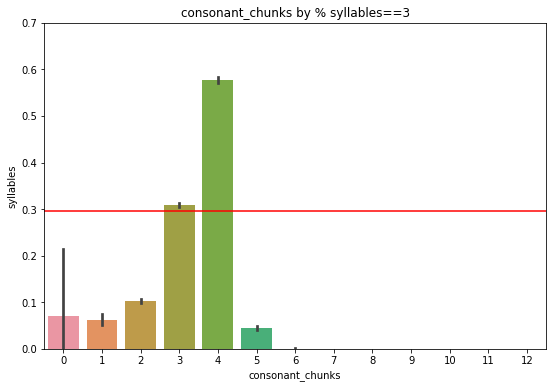

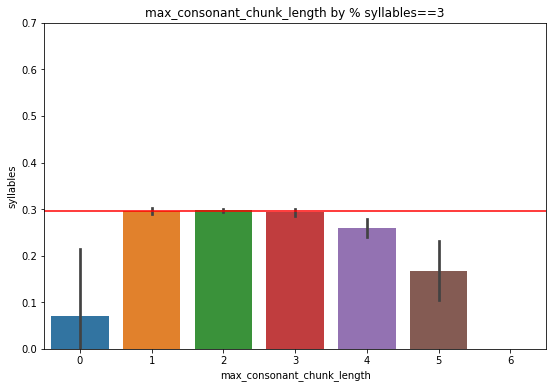

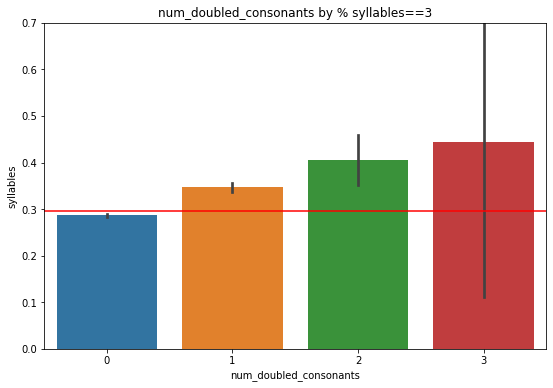

In [22]:
xdf.barplots_low_card_feat_by_target_eq_class('syllables', 3, nunique=18)

In [23]:
xdf.value_counts(['syllables', 'syllables_group', 'max_consonant_chunk_length'])

,count,percentage
syllables,,
2,31938,0.358544
3,26304,0.295295
4,14875,0.166990
1,7684,0.086262
5,6023,0.067616
6,1672,0.018770
7,444,0.004984
8,105,0.001179
9,22,0.000247


,count,percentage
syllables_group,,
3-5,47202,0.529901
1-2,39622,0.444806
6+,2253,0.025293


,count,percentage
max_consonant_chunk_length,,
2,54217,0.608653
1,18896,0.212131
3,14003,0.157201
4,1818,0.020409
5,125,0.001403
0,14,0.000157
6,4,0.000045


In [0]:
xdates = Explorator(dates)

In [25]:
xdates.expand_date_parts('Date', simple=False)

,year,month,day,day_of_week,day_of_year,week,quarter
0,2017,1,4,2,4,1,1
1,2017,1,11,2,11,2,1
2,2017,1,18,2,18,3,1
3,2017,1,25,2,25,4,1
4,2017,2,1,2,32,5,1
5,2017,2,8,2,39,6,1
6,2017,2,15,2,46,7,1
7,2017,2,22,2,53,8,1
8,2017,3,1,2,60,9,1
9,2017,3,8,2,67,10,1
